<a href="https://colab.research.google.com/github/spe301/AI-generated-AI/blob/main/AI_generated_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Potosnail==0.2.3

In [2]:
!pip install Potofox==0.0.1

In [3]:
from potofox import *
from potosnail import *

wiki = datasets().load_wikipedia()
X = wiki['data']
y = wiki['target']
v = wiki['vocab']
df = datasets().load_nlp(8)

def ModelBuilder(df, task):
  wr = Wrappers()
  dh = DataHelper()
  ml = MachineLearning()
  db = DataBuilder()
  if task == 'NLP':
    df2 = db.ResultsNLP(df)
  vanilla, grid, X, Xval, y, yval = wr.Vanilla(df2, 'quality', 'regression')
  Xs = dh.ScaleData('standard', X)
  model = ml.Optimize(vanilla, grid, Xs, y)
  return model
  
reg = ModelBuilder(df, 'NLP')

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.1s finished


In [12]:
def GetDC(y):
  vc = list(dict(pd.DataFrame(y).value_counts()).values())
  return max(vc) / sum(vc)

In [18]:
def BuildNLP(model, grid, vocab_dim, X, y): 
  db = DataBuilder()
  dh = DataHelper()
  dl = DeepLearning()
  len_dataset = X.shape[0]
  n_features = X.shape[1]
  dominant_class = GetDC(y)
  combos = db.ResultsNLP(db.BuildCombos(grid, len_dataset, n_features, dominant_class), gridding=True)
  c2 = dh.ScaleData('standard', combos)
  combos['quality'] = model.predict(c2)
  best = combos.loc[combos['quality'] == max(combos['quality'])].iloc[0]
  res = dict(best)
  if res['relu'] == 1:
    activation = 'relu'
  if res['tanh'] == 1:
    activation = 'tanh'
  if res['L1'] == 1:
    regularizer = 'L1' 
  if res['L2'] == 1:
    regularizer = 'L2' 
  if res['None'] == 1:
    regularizer = 'None' 
  if res['adam'] == 1:
    optimizer = 'adam'
  if res['rmsprop'] == 1:
    optimizer = 'rmsprop'
  if res['sgd'] == 1:
    optimizer = 'sgd'
  if res['GRU'] == 1:
    method = 'GRU'
  if res['LSTM'] == 1:
    method = 'LSTM' 
  dm = dl.RNN(int(res['output_dim']), int(res['embedding']), int(res['nodes']), activation, regularizer, 
              bool(res['stacking']), bool(res['dropout']), optimizer, method, bool(res['bidirectional']))
  epochs = int(res['epochs'])
  bs = int(res['batch_size'])
  dm.fit(X, y, epochs=epochs, batch_size=bs, validation_split=0.2)
  return dm

In [14]:
lables = pd.DataFrame(y)
lables.columns = wiki['classes']
y2 = np.array(lables['AI'])

In [25]:
grid = {'output_dim': [2], #because we have 2 classes
          'embedding': [45589], #vocab is number of unique words in dataset
          'nodes': list(range(32, 68, 4)), #we will test between 32 and 64 nodes for the first layer
          'activation': ['tanh', 'relu'], #we will test between relu and tanh for activation function
          'regularizer': ['L1', None, 'L2'], #we will use L1 reqularization to prevent overfitting
          'stacking': [False, True], #stacking makes the first 2 layers the same, we will not do this
          'dropout': [False, True], #we will not use dropout because we are already using L1 regularization
          'optimizer': ['adam', 'rmsprop', 'sgd'], #we will test between adam and rmsprop for optimization function
          'method': ['LSTM', 'GRU'], #we will test between using an LSTM cell and a GRU cell
          'bidirectional': [True, False], 'epochs': list(range(5, 60, 5)), 'batch_size': [32, 64]}

dm = BuildNLP(reg, grid, v, X, y2)
dm.summary()

(360, 2)

<AxesSubplot:xlabel='Predict', ylabel='True'>

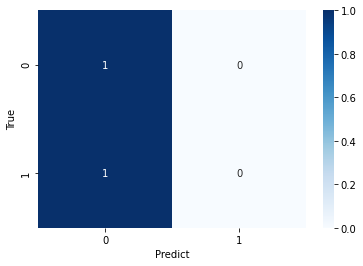

In [21]:
Evaluater().BuildConfusionDL(dm, X, y)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/spe301/AI-generated-AI/main/Data/NLP8.csv').drop(['Unnamed: 0'], axis='columns')
#train, val = dh.HoldOut(df)

grid = {'output_dim': [2], #because we have 2 classes
          'embedding': [45589], #vocab is number of unique words in dataset
          'nodes': list(range(32, 68, 4)), #we will test between 32 and 64 nodes for the first layer
          'activation': ['tanh', 'relu'], #we will test between relu and tanh for activation function
          'regularizer': ['L1', None, 'L2'], #we will use L1 reqularization to prevent overfitting
          'stacking': [False, True], #stacking makes the first 2 layers the same, we will not do this
          'dropout': [False, True], #we will not use dropout because we are already using L1 regularization
          'optimizer': ['adam', 'rmsprop', 'sgd'], #we will test between adam and rmsprop for optimization function
          'method': ['LSTM', 'GRU'], #we will test between using an LSTM cell and a GRU cell
          'bidirectional': [True, False], 'epochs': list(range(5, 60, 5)), 'batch_size': [32, 64]}

In [ ]:
reg = ModelBuilder(df, 'NLP')
reg

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.7s finished


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
BuildNLP(reg, grid, len_dataset=360, n_features=1724, vocab_dim=45589)[0].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          1458848   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 1,476,562
Trainable params: 1,476,562
Non-trainable params: 0
_________________________________________________________________
